# EMD model

In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from numpy import nan
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedKFold, cross_val_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from PyEMD import EMD

C:\Users\Nimma Harshitha\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
series = pd.read_csv('D:/MINI/univariate_KBPS_hdr.csv',header=0,index_col=0,parse_dates=[0])
series = series.resample('10T').sum()   # T for minutes 10T - 10min, 15T - 15min, H for Hours, D for Day
print(series.head())
print(len(series))
data = series.values
data=data.flatten()

                      frame.len
Dateandtime                    
2003-12-07 05:30:00   94839.435
2003-12-07 05:40:00   59537.895
2003-12-07 05:50:00   60293.757
2003-12-07 06:00:00   83634.900
2003-12-07 06:10:00  130818.833
13105


In [3]:
emd = EMD()
IMF = emd.emd(data)
#print(len(IMF)
print(len(IMF[1]))
print(len(IMF[2]))
print(len(IMF[3]))
print(len(IMF))
print('-------trying loop--------')
for i in range(len(IMF)):
    print("IMF:",i)
    print(IMF[i])

x: [9.48394350e+04 5.95378950e+04 6.02937570e+04 ... 1.48901868e+05
 2.89194703e+05 1.23960000e+02]
13105
13105
13105
13
-------trying loop--------
IMF: 0
[ -8689.68858692 -21870.79750049 -21875.71112342 ... -44275.80279768
  48894.35801266 -50508.84855272]
IMF: 1
[  8407.79155586 -12459.39169869 -12688.01816884 ...    285.77647604
  61572.85197695 -62124.4729372 ]
IMF: 2
[ -8152.22422814  -8895.80877199  -4970.61833828 ...  38194.49989404
  30232.64090756 -31477.5514678 ]
IMF: 3
[ 10662.97990177  11433.31875528   8457.4734777  ... -10360.1832586
 -12758.14710322 -12249.80621981]
IMF: 4
[-28258.70462848 -28384.58435645 -26659.04415517 ...  19001.15308133
  16903.82991168  14251.62138348]
IMF: 5
[11333.18857044 11740.54721952 11649.64463201 ... 36931.10784662
 35292.61682469 33320.9307439 ]
IMF: 6
[-43882.65131598 -45842.05565374 -47747.2631131  ...  50715.87793355
  50730.08969311  50645.79508363]
IMF: 7
[ 50311.85580029  50667.19112587  50920.79004729 ... -70500.21523966
 -71609.11050

In [4]:
#np.savetxt("IMFs of 10 Min", np.column_stack((IMF[0],IMF[1],IMF[2],IMF[3],IMF[4],IMF[5],IMF[6],IMF[7],IMF[8],IMF[9],IMF[10],IMF[11])),delimiter=",")

In [5]:
IMF.shape[0]+1

14

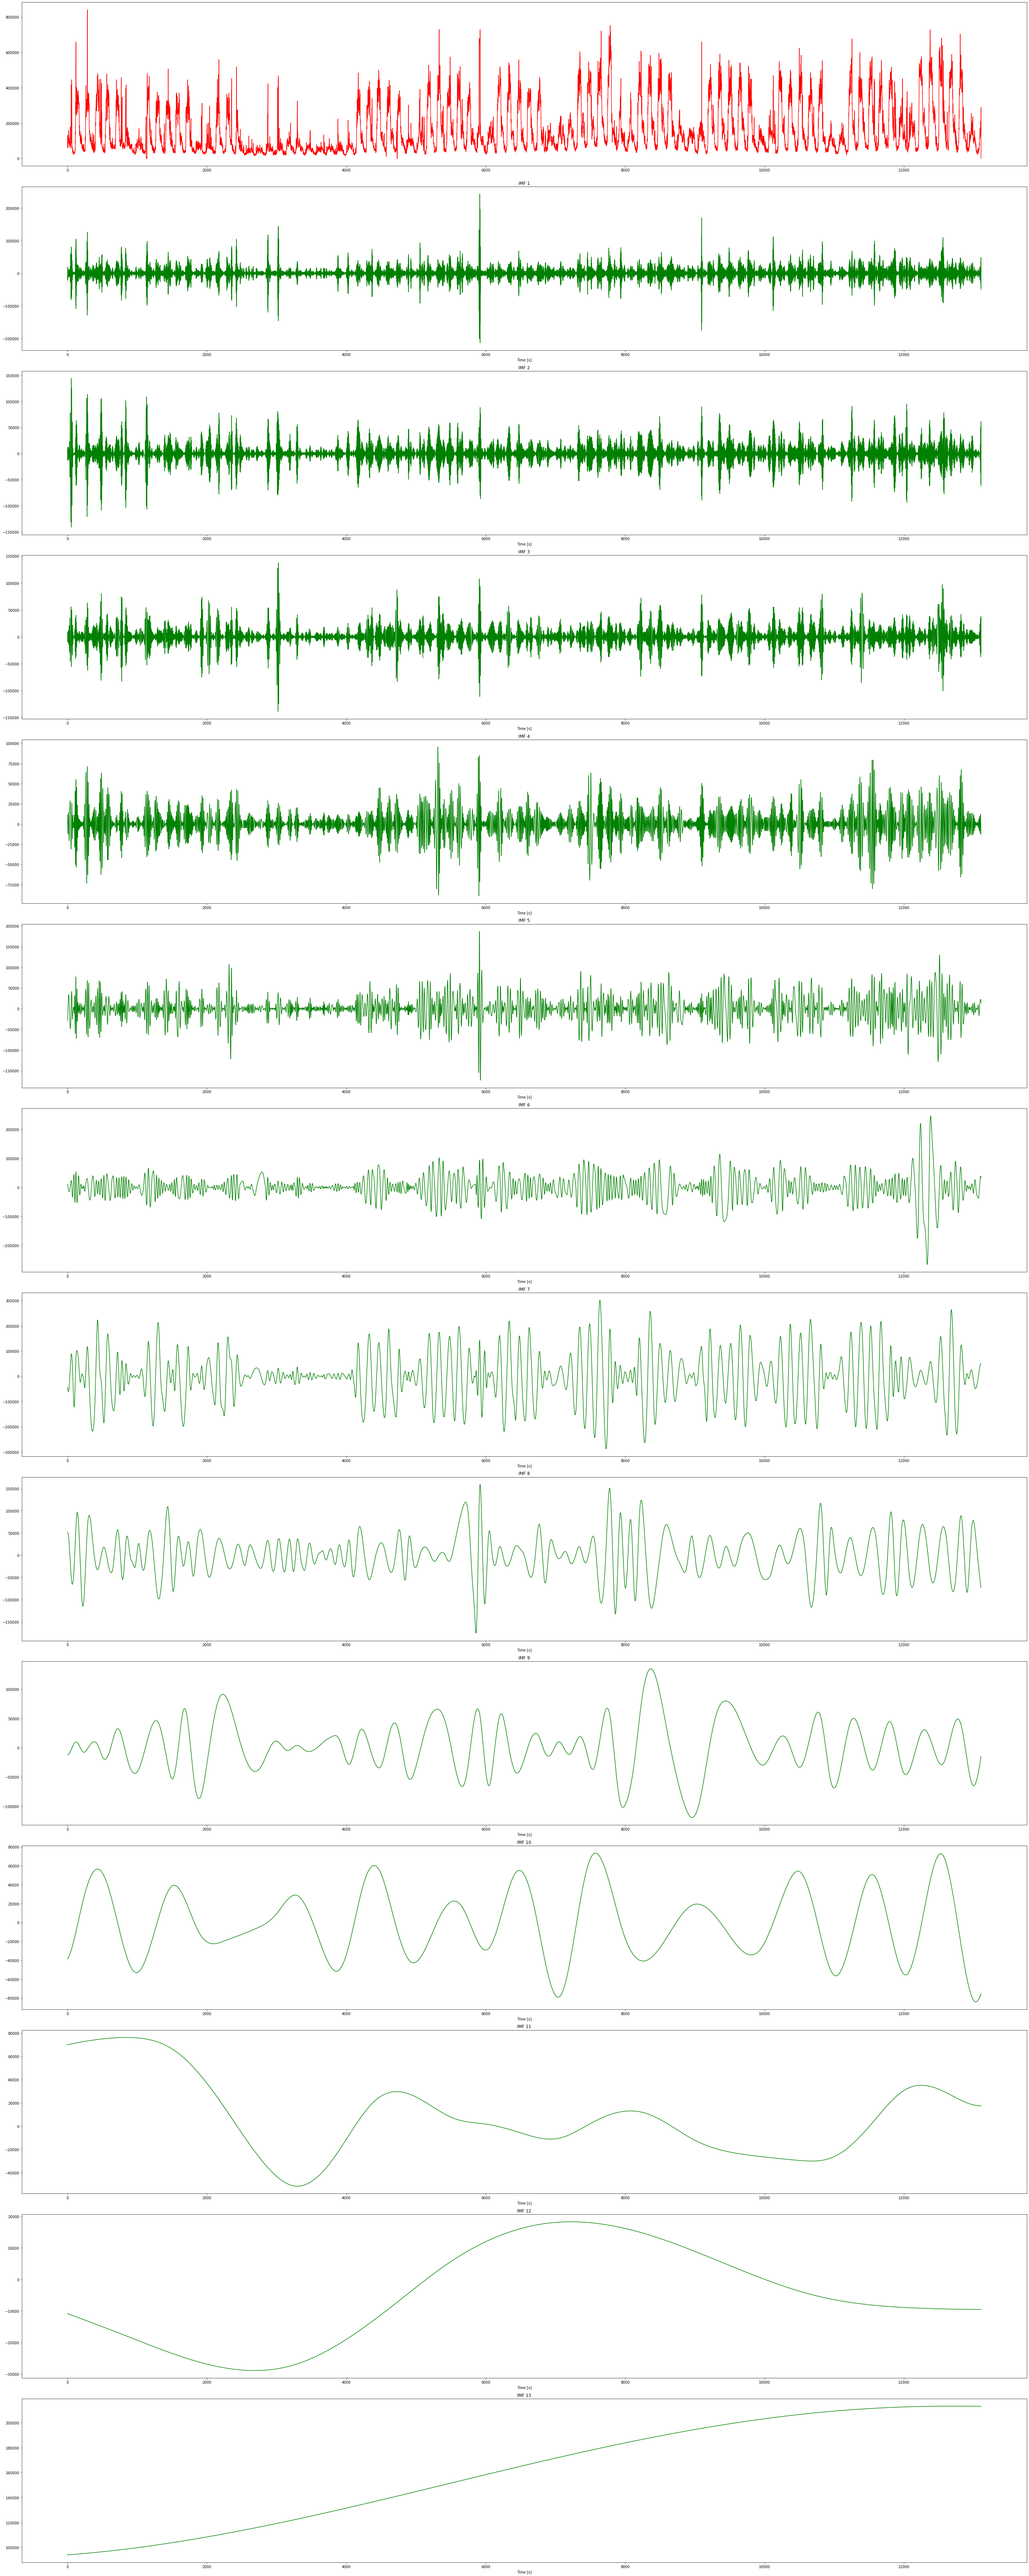

In [6]:
from matplotlib import pyplot as plt
N = IMF.shape[0]+1
plt.figure(figsize=(40,100))
plt.subplot(N,1,1)
plt.plot(data, 'r')
#plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
#plt.xlabel("Time [s]")
for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

In [8]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:(i+time_step)])
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)  

In [9]:
a = int(len(IMF[0])*0.8)
print(a)
train_data_0, test_data_0 = IMF[0][0:a+1], IMF[0][a:]
print(len(train_data_0),len(test_data_0))
time_step=1
X_train_0, y_train_0 = create_dataset(train_data_0, time_step)
X_test_0, y_test_0 = create_dataset(test_data_0, time_step)

10484
10485 2621


In [10]:
b = int(len(IMF[1])*0.8)
print(b)
train_data_1, test_data_1 = IMF[1][0:a+1], IMF[1][a:]
print(len(train_data_1),len(test_data_1))
X_train_1, y_train_1 = create_dataset(train_data_1, time_step)
X_test_1, y_test_1 = create_dataset(test_data_1, time_step)

10484
10485 2621


In [11]:
c = int(len(IMF[2])*0.8)
print(c)
train_data_2, test_data_2 = IMF[2][0:a+1], IMF[2][a:]
print(len(train_data_2),len(test_data_2))
X_train_2, y_train_2 = create_dataset(train_data_2, time_step)
X_test_2, y_test_2 = create_dataset(test_data_2, time_step)

10484
10485 2621


In [12]:
d = int(len(IMF[3])*0.8)
print(d)
train_data_3, test_data_3 = IMF[3][0:a+1], IMF[3][a:]
print(len(train_data_1),len(test_data_1))
X_train_3, y_train_3 = create_dataset(train_data_3, time_step)
X_test_3, y_test_3 = create_dataset(test_data_3, time_step)

10484
10485 2621


In [13]:
e = int(len(IMF[4])*0.8)
print(e)
train_data_4, test_data_4 = IMF[4][0:a+1], IMF[4][a:]
print(len(train_data_4),len(test_data_4))
X_train_4, y_train_4 = create_dataset(train_data_4, time_step)
X_test_4, y_test_4 = create_dataset(test_data_4, time_step)

10484
10485 2621


In [14]:
f = int(len(IMF[5])*0.8)
print(f)
train_data_5, test_data_5 = IMF[5][0:a+1], IMF[5][a:]
print(len(train_data_5),len(test_data_5))
X_train_5, y_train_5 = create_dataset(train_data_5, time_step)
X_test_5, y_test_5 = create_dataset(test_data_5, time_step)

10484
10485 2621


In [15]:
g = int(len(IMF[6])*0.8)
print(g)
train_data_6, test_data_6 = IMF[6][0:a+1], IMF[6][a:]
print(len(train_data_6),len(test_data_6))
X_train_6, y_train_6 = create_dataset(train_data_6, time_step)
X_test_6, y_test_6 = create_dataset(test_data_6, time_step)

10484
10485 2621


In [16]:
h = int(len(IMF[7])*0.8)
print(h)
train_data_7, test_data_7 = IMF[7][0:a+1], IMF[7][a:]
print(len(train_data_7),len(test_data_7))
X_train_7, y_train_7 = create_dataset(train_data_7, time_step)
X_test_7, y_test_7 = create_dataset(test_data_7, time_step)

10484
10485 2621


In [17]:
i = int(len(IMF[8])*0.8)
print(i)
train_data_8, test_data_8 = IMF[8][0:a+1], IMF[8][a:]
print(len(train_data_8),len(test_data_8))
X_train_8, y_train_8 = create_dataset(train_data_8, time_step)
X_test_8, y_test_8 = create_dataset(test_data_8, time_step)

10484
10485 2621


In [18]:
i = int(len(IMF[9])*0.8)
print(i)
train_data_9, test_data_9 = IMF[9][0:a+1], IMF[9][a:]
print(len(train_data_9),len(test_data_9))
X_train_9, y_train_9 = create_dataset(train_data_9, time_step)
X_test_9, y_test_9 = create_dataset(test_data_9, time_step)

10484
10485 2621


In [19]:
i = int(len(IMF[10])*0.8)
print(i)
train_data_10, test_data_10 = IMF[10][0:a+1], IMF[10][a:]
print(len(train_data_10),len(test_data_10))
X_train_10, y_train_10 = create_dataset(train_data_10, time_step)
X_test_10, y_test_10 = create_dataset(test_data_10, time_step)

10484
10485 2621


In [20]:
i = int(len(IMF[11])*0.8)
print(i)
train_data_11, test_data_11 = IMF[11][0:a+1], IMF[11][a:]
print(len(train_data_11),len(test_data_11))
X_train_11, y_train_11 = create_dataset(train_data_11, time_step)
X_test_11, y_test_11 = create_dataset(test_data_11, time_step)

10484
10485 2621


In [30]:
i = int(len(IMF[12])*0.8)
print(i)
train_data_12, test_data_12 = IMF[12][0:a+1], IMF[11][a:]
print(len(train_data_12),len(test_data_12))
X_train_12, y_train_12 = create_dataset(train_data_12, time_step)
X_test_12, y_test_12 = create_dataset(test_data_12, time_step)

10484
10485 2621


In [31]:
train_data_1

array([  8407.79155586, -12459.39169869, -12688.01816884, ...,
       -15587.0907665 , -17939.81631102,   8558.84655099])

In [32]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
def statistics(y_true, y_pred):
    MAE = metrics.mean_absolute_error(y_true, y_pred)
    print('Mean Absolute Error : %.3f' % MAE )
    RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error : %.3f' % RMSE )
    MSE = metrics.mean_squared_error(y_true, y_pred)
    print('Mean Squared Error : %.3f' % MSE, )
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    print('MAPE  :%.3f' % MAPE)
    NRMSE = RMSE/(np.max(y_true)- np.min(y_true))
    print('Normalized Root Mean Squared Error : %.3f' % NRMSE )
    d=[]
    d.append(MAE)
    d.append(RMSE)
    d.append(MSE)
    d.append(MAPE)
    d.append(NRMSE)
    return d

# RandomForest

In [34]:
rf = RandomForestRegressor()
rf.fit(X_train_0,y_train_0)
rf_pred_0 = rf.predict(X_test_0)
rf.fit(X_train_1,y_train_1)
rf_pred_1 = rf.predict(X_test_1)

rf.fit(X_train_2,y_train_2)
rf_pred_2 = rf.predict(X_test_2)
rf.fit(X_train_3,y_train_3)
rf_pred_3 = rf.predict(X_test_3)

rf.fit(X_train_4,y_train_4)
rf_pred_4 = rf.predict(X_test_4)
rf.fit(X_train_5,y_train_5)
rf_pred_5 = rf.predict(X_test_5)

rf.fit(X_train_6,y_train_6)
rf_pred_6 = rf.predict(X_test_6)
rf.fit(X_train_7,y_train_7)
rf_pred_7 = rf.predict(X_test_7)

rf.fit(X_train_8,y_train_8)
rf_pred_8 = rf.predict(X_test_8)
rf.fit(X_train_9,y_train_9)
rf_pred_9 = rf.predict(X_test_9)

rf.fit(X_train_10,y_train_10)
rf_pred_10 = rf.predict(X_test_10)

rf.fit(X_train_11,y_train_11)
rf_pred_11 = rf.predict(X_test_11)

rf.fit(X_train_12,y_train_12)
rf_pred_12 = rf.predict(X_test_12)

In [35]:
final_rf_pred = rf_pred_0+rf_pred_1+rf_pred_2+rf_pred_3+rf_pred_4+rf_pred_5+rf_pred_6+rf_pred_7+rf_pred_8+rf_pred_9+rf_pred_10+rf_pred_11+rf_pred_12
actual_y_test = y_test_1+y_test_2+y_test_3+y_test_4+y_test_5+y_test_6+y_test_7+y_test_8+y_test_9+y_test_10+y_test_11+y_test_12
rff1=[]
rff1.append("RandomForest")
rff1.append("EMD")
rff1.extend(statistics(actual_y_test,final_rf_pred))

Mean Absolute Error : 103499.025
Root Mean Squared Error : 109486.329
Mean Squared Error : 11987256235.094
MAPE  :257.574
Normalized Root Mean Squared Error : 0.162


# XGBoost

In [36]:
xgbr = XGBRegressor()

xgbr.fit(X_train_0,y_train_0)
xgbr_pred_0 = xgbr.predict(X_test_0)

xgbr.fit(X_train_1,y_train_1)
xgbr_pred_1 = xgbr.predict(X_test_1)
xgbr.fit(X_train_2,y_train_2)
xgbr_pred_2 = xgbr.predict(X_test_2)

xgbr.fit(X_train_3,y_train_3)
xgbr_pred_3 = xgbr.predict(X_test_3)
xgbr.fit(X_train_4,y_train_4)
xgbr_pred_4 = xgbr.predict(X_test_4)

xgbr.fit(X_train_5,y_train_5)
xgbr_pred_5 = xgbr.predict(X_test_5)
xgbr.fit(X_train_6,y_train_6)
xgbr_pred_6 = xgbr.predict(X_test_6)

xgbr.fit(X_train_7,y_train_7)
xgbr_pred_7 = xgbr.predict(X_test_7)
xgbr.fit(X_train_8,y_train_8)
xgbr_pred_8 = xgbr.predict(X_test_8)

xgbr.fit(X_train_9,y_train_9)
xgbr_pred_9 = xgbr.predict(X_test_9)
xgbr.fit(X_train_10,y_train_10)
xgbr_pred_10 = xgbr.predict(X_test_10)

xgbr.fit(X_train_11,y_train_11)
xgbr_pred_11 = xgbr.predict(X_test_11)

xgbr.fit(X_train_12,y_train_12)
xgbr_pred_12 = xgbr.predict(X_test_12)

In [37]:
final_xgbr_pred = xgbr_pred_0+xgbr_pred_1+xgbr_pred_2+xgbr_pred_3+xgbr_pred_4+xgbr_pred_5+xgbr_pred_6+xgbr_pred_7+xgbr_pred_8+xgbr_pred_9+xgbr_pred_10+xgbr_pred_11+xgbr_pred_12
xbr1=[]
xbr1.append('XGBRegressor')
xbr1.append("EMD")
xbr1.extend(statistics(actual_y_test,final_xgbr_pred))

Mean Absolute Error : 103359.366
Root Mean Squared Error : 108344.993
Mean Squared Error : 11738637613.439
MAPE  :260.478
Normalized Root Mean Squared Error : 0.160


# LGBM

In [38]:
lgb = LGBMRegressor()

lgb.fit(X_train_0,y_train_0)
lgb_pred_0 = lgb.predict(X_test_0)

lgb.fit(X_train_1,y_train_1)
lgb_pred_1 = lgb.predict(X_test_1)

lgb.fit(X_train_2,y_train_2)
lgb_pred_2 = lgb.predict(X_test_2)

lgb.fit(X_train_3,y_train_3)
lgb_pred_3 = lgb.predict(X_test_3)

lgb.fit(X_train_4,y_train_4)
lgb_pred_4 = lgb.predict(X_test_4)

lgb.fit(X_train_5,y_train_5)
lgb_pred_5 = lgb.predict(X_test_5)

lgb.fit(X_train_6,y_train_6)
lgb_pred_6 = lgb.predict(X_test_6)

lgb.fit(X_train_7,y_train_7)
lgb_pred_7 = lgb.predict(X_test_7)

lgb.fit(X_train_8,y_train_8)
lgb_pred_8 = lgb.predict(X_test_8)

lgb.fit(X_train_9,y_train_9)
lgb_pred_9 = lgb.predict(X_test_9)

lgb.fit(X_train_10,y_train_10)
lgb_pred_10 = lgb.predict(X_test_10)

lgb.fit(X_train_11,y_train_11)
lgb_pred_11 = lgb.predict(X_test_11)

lgb.fit(X_train_12,y_train_12)
lgb_pred_12 = lgb.predict(X_test_12)


final_lgb_pred = lgb_pred_0+lgb_pred_1+lgb_pred_2+lgb_pred_3+lgb_pred_4+lgb_pred_5+lgb_pred_6+lgb_pred_7+lgb_pred_8+lgb_pred_9+lgb_pred_10+lgb_pred_11+lgb_pred_12
lgbm1=[]
lgbm1.append("LGBM")
lgbm1.append("EMD")
lgbm1.extend(statistics(actual_y_test,final_lgb_pred))

Mean Absolute Error : 102756.874
Root Mean Squared Error : 107435.426
Mean Squared Error : 11542370823.489
MAPE  :264.664
Normalized Root Mean Squared Error : 0.159


# EEMD model

In [39]:
from pandas import read_csv
import pandas as pd
import numpy as np
from numpy import nan
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedKFold, cross_val_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#from sklearn.ensemble import StackingRegressor
#from mlxtend.regressor import StackingCVRegressor    # uses hold out or out of sample predictions method 
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from matplotlib import pyplot
from sklearn.svm import SVR
from PyEMD import EEMD

In [40]:
series = pd.read_csv('D:/MINI/univariate_KBPS_hdr.csv',header=0,index_col=0,parse_dates=[0])
series = series.resample('10T').sum()   # T for minutes 10T - 10min, 15T - 15min, H for Hours, D for Day
print(series.head())
print(len(series))
data = series.values
data=data.flatten()

                      frame.len
Dateandtime                    
2003-12-07 05:30:00   94839.435
2003-12-07 05:40:00   59537.895
2003-12-07 05:50:00   60293.757
2003-12-07 06:00:00   83634.900
2003-12-07 06:10:00  130818.833
13105


In [41]:
eemd = EEMD()
IMF = eemd.eemd(data)
#print(len(IMF)
print(len(IMF[1]))
print(len(IMF[2]))
print(len(IMF[3]))
print(len(IMF))
print('-------trying loop--------')
for i in range(len(IMF)):
    print("IMF:",i)
    print(IMF[i])

13105
13105
13105
13
-------trying loop--------
IMF: 0
[   5914.94021464   -8475.26165154  -12522.51955059 ...  -60366.05463919
   96721.82149596 -100535.5507733 ]
IMF: 1
[ -5759.76901567 -15854.56018698 -15863.74756455 ...  28372.695119
  30039.80867141 -36831.15946296]
IMF: 2
[ -2754.75409158  -4557.26641381  -2054.11038908 ...  14332.23386949
   4648.4625892  -12502.32797173]
IMF: 3
[-2805.13582641 -4016.7615761  -5422.58398675 ...  2932.99535455
 -1033.41915332 -4890.77986912]
IMF: 4
[ 6626.10382664  7264.60291772  8041.22721235 ... 21686.69483174
 20107.41454632 18415.17214064]
IMF: 5
[-32621.44230778 -32667.34016734 -32660.61683785 ...  42138.38756902
  41499.31794904  40627.48936108]
IMF: 6
[ -506.28883519  -799.78894749 -1114.54393635 ... -4667.33945448
 -4784.55859761 -4941.08727228]
IMF: 7
[-26718.28584288 -26812.72276599 -26901.76624283 ... -35846.69260819
 -35641.99283016 -35436.73968266]
IMF: 8
[-17801.07015489 -17801.93371475 -17801.09952185 ... -80430.89454202
 -80319.34

In [42]:
#np.savetxt("IMFs of 10 Min", np.column_stack((IMF[0],IMF[1],IMF[2],IMF[3],IMF[4],IMF[5],IMF[6],IMF[7],IMF[8],IMF[9],IMF[10],IMF[11])),delimiter=",")

In [45]:
IMF.shape[0]+1

14

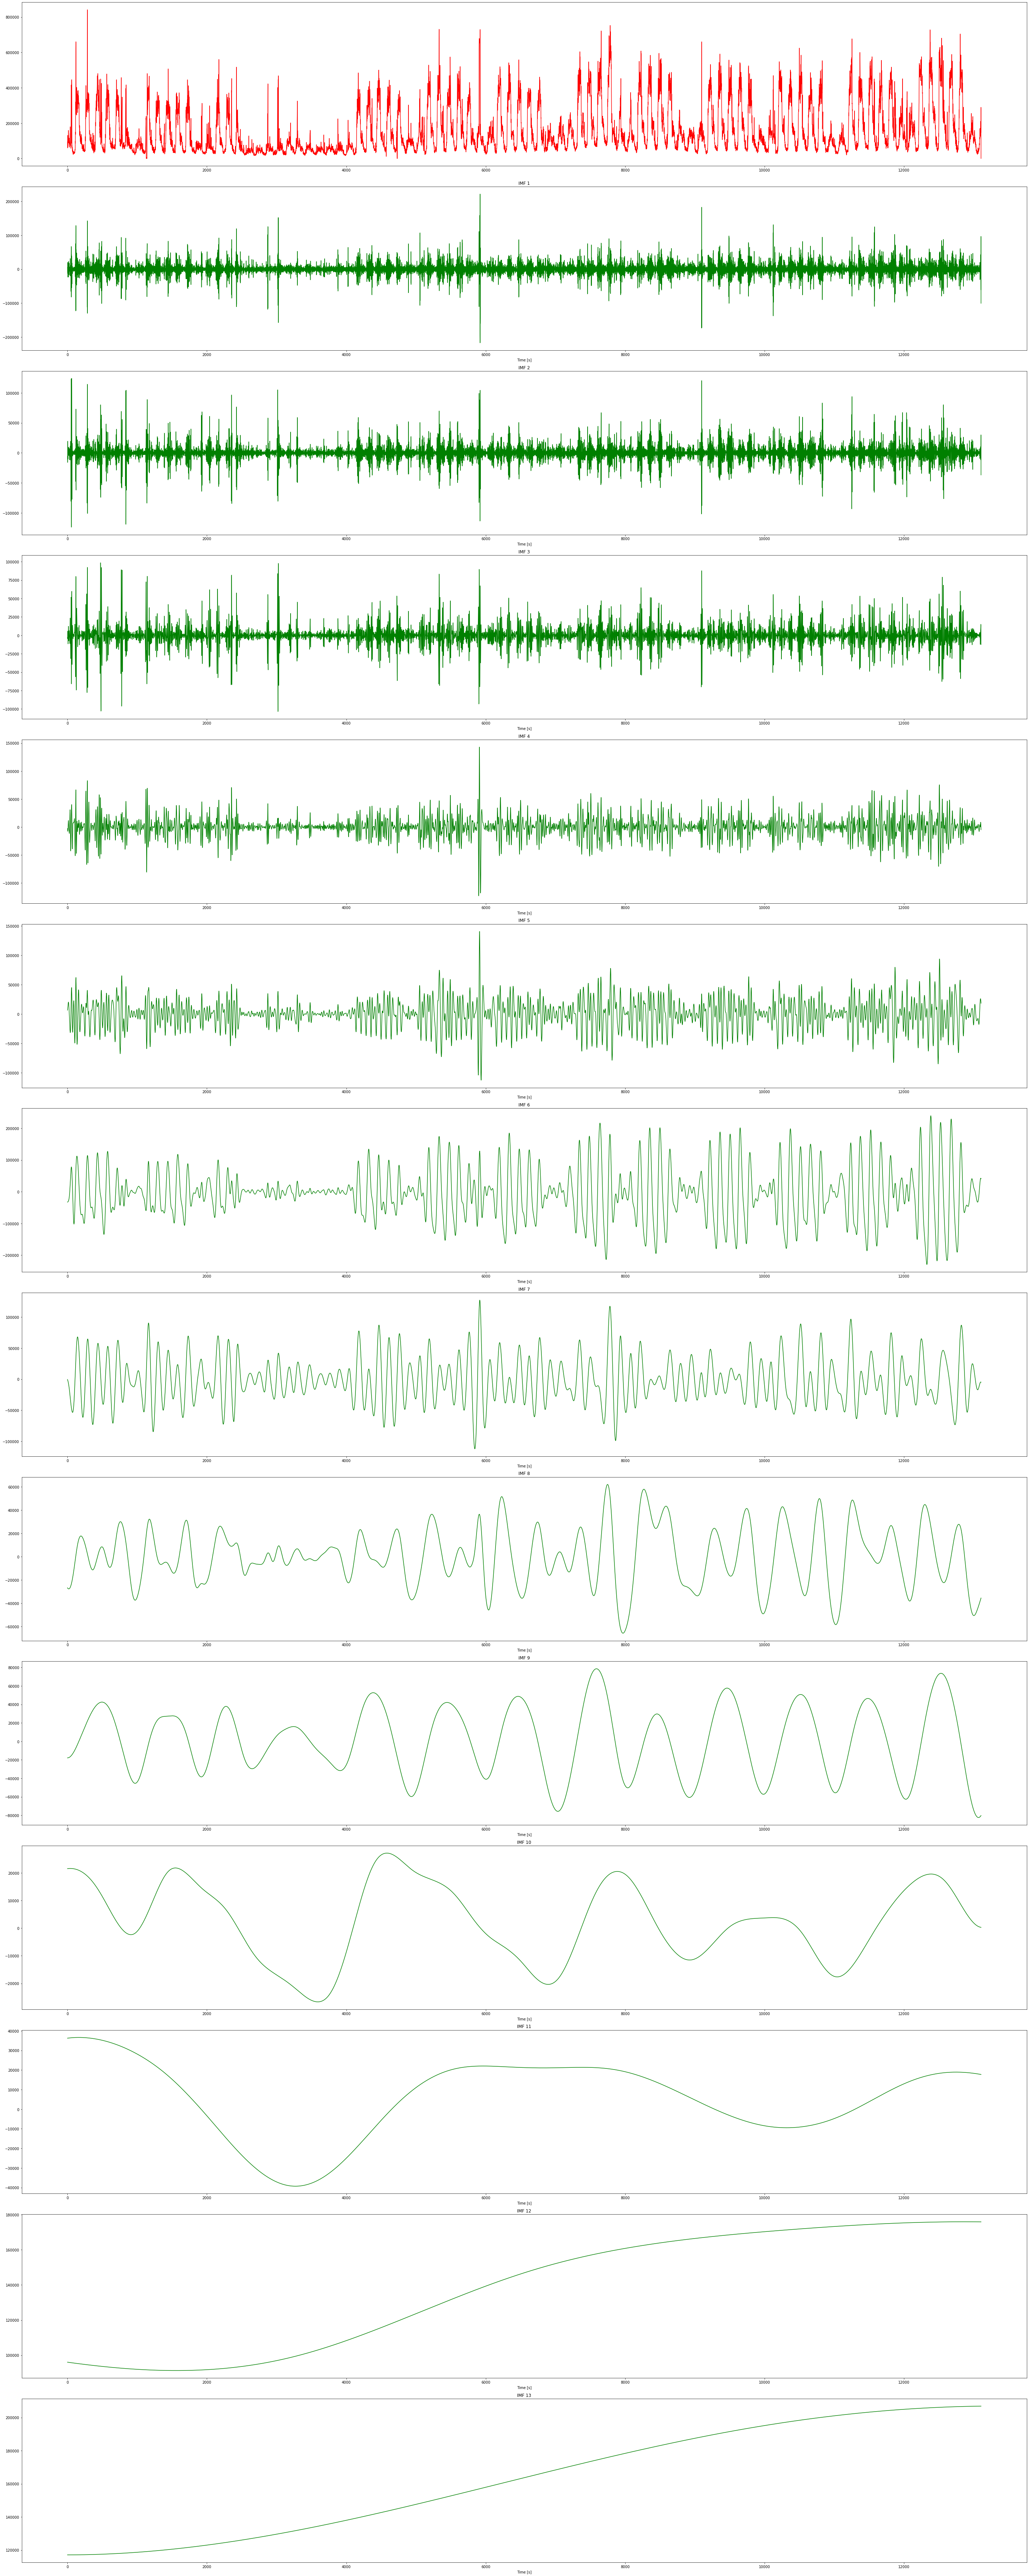

In [44]:
from matplotlib import pyplot as plt
N = IMF.shape[0]+1
plt.figure(figsize=(40,100))
plt.subplot(N,1,1)
plt.plot(data, 'r')
#plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
#plt.xlabel("Time [s]")
for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")
plt.tight_layout()
plt.show()

In [46]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:(i+time_step)])
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)  

In [47]:
a = int(len(IMF[0])*0.8)
print(a)
train_data_0, test_data_0 = IMF[0][0:a+1], IMF[0][a:]
print(len(train_data_0),len(test_data_0))
time_step=1
X_train_0, y_train_0 = create_dataset(train_data_0, time_step)
X_test_0, y_test_0 = create_dataset(test_data_0, time_step)

10484
10485 2621


In [48]:
b = int(len(IMF[1])*0.8)
print(b)
train_data_1, test_data_1 = IMF[1][0:a+1], IMF[1][a:]
print(len(train_data_1),len(test_data_1))
X_train_1, y_train_1 = create_dataset(train_data_1, time_step)
X_test_1, y_test_1 = create_dataset(test_data_1, time_step)

10484
10485 2621


In [49]:
c = int(len(IMF[2])*0.8)
print(c)
train_data_2, test_data_2 = IMF[2][0:a+1], IMF[2][a:]
print(len(train_data_2),len(test_data_2))
X_train_2, y_train_2 = create_dataset(train_data_2, time_step)
X_test_2, y_test_2 = create_dataset(test_data_2, time_step)

10484
10485 2621


In [50]:
d = int(len(IMF[3])*0.8)
print(d)
train_data_3, test_data_3 = IMF[3][0:a+1], IMF[3][a:]
print(len(train_data_1),len(test_data_1))
X_train_3, y_train_3 = create_dataset(train_data_3, time_step)
X_test_3, y_test_3 = create_dataset(test_data_3, time_step)

10484
10485 2621


In [51]:
e = int(len(IMF[4])*0.8)
print(e)
train_data_4, test_data_4 = IMF[4][0:a+1], IMF[4][a:]
print(len(train_data_4),len(test_data_4))
X_train_4, y_train_4 = create_dataset(train_data_4, time_step)
X_test_4, y_test_4 = create_dataset(test_data_4, time_step)

10484
10485 2621


In [52]:
f = int(len(IMF[5])*0.8)
print(f)
train_data_5, test_data_5 = IMF[5][0:a+1], IMF[5][a:]
print(len(train_data_5),len(test_data_5))
X_train_5, y_train_5 = create_dataset(train_data_5, time_step)
X_test_5, y_test_5 = create_dataset(test_data_5, time_step)

10484
10485 2621


In [53]:
g = int(len(IMF[6])*0.8)
print(g)
train_data_6, test_data_6 = IMF[6][0:a+1], IMF[6][a:]
print(len(train_data_6),len(test_data_6))
X_train_6, y_train_6 = create_dataset(train_data_6, time_step)
X_test_6, y_test_6 = create_dataset(test_data_6, time_step)

10484
10485 2621


In [54]:
h = int(len(IMF[7])*0.8)
print(h)
train_data_7, test_data_7 = IMF[7][0:a+1], IMF[7][a:]
print(len(train_data_7),len(test_data_7))
X_train_7, y_train_7 = create_dataset(train_data_7, time_step)
X_test_7, y_test_7 = create_dataset(test_data_7, time_step)

10484
10485 2621


In [55]:
i = int(len(IMF[8])*0.8)
print(i)
train_data_8, test_data_8 = IMF[8][0:a+1], IMF[8][a:]
print(len(train_data_8),len(test_data_8))
X_train_8, y_train_8 = create_dataset(train_data_8, time_step)
X_test_8, y_test_8 = create_dataset(test_data_8, time_step)

10484
10485 2621


In [56]:
i = int(len(IMF[9])*0.8)
print(i)
train_data_9, test_data_9 = IMF[9][0:a+1], IMF[9][a:]
print(len(train_data_9),len(test_data_9))
X_train_9, y_train_9 = create_dataset(train_data_9, time_step)
X_test_9, y_test_9 = create_dataset(test_data_9, time_step)

10484
10485 2621


In [57]:
i = int(len(IMF[10])*0.8)
print(i)
train_data_10, test_data_10 = IMF[10][0:a+1], IMF[10][a:]
print(len(train_data_10),len(test_data_10))
X_train_10, y_train_10 = create_dataset(train_data_10, time_step)
X_test_10, y_test_10 = create_dataset(test_data_10, time_step)

10484
10485 2621


In [59]:
i = int(len(IMF[11])*0.8)
print(i)
train_data_11, test_data_11 = IMF[11][0:a+1], IMF[11][a:]
print(len(train_data_11),len(test_data_11))
X_train_11, y_train_11 = create_dataset(train_data_11, time_step)
X_test_11, y_test_11 = create_dataset(test_data_11, time_step)

10484
10485 2621


In [60]:
i = int(len(IMF[12])*0.8)
print(i)
train_data_12, test_data_12 = IMF[12][0:a+1], IMF[11][a:]
print(len(train_data_12),len(test_data_12))
X_train_12, y_train_12 = create_dataset(train_data_12, time_step)
X_test_12, y_test_12 = create_dataset(test_data_12, time_step)

10484
10485 2621


In [61]:
train_data_1

array([ -5759.76901567, -15854.56018698, -15863.74756455, ...,
        -2467.6759217 ,   2464.53199987,  12016.1382188 ])

In [62]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [63]:
def statistics(y_true, y_pred):
    MAE = metrics.mean_absolute_error(y_true, y_pred)
    print('Mean Absolute Error : %.3f' % MAE )
    RMSE = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error : %.3f' % RMSE )
    MSE = metrics.mean_squared_error(y_true, y_pred)
    print('Mean Squared Error : %.3f' % MSE, )
    MAPE = mean_absolute_percentage_error(y_true, y_pred)
    print('MAPE  :%.3f' % MAPE)
    NRMSE = RMSE/(np.max(y_true)- np.min(y_true))
    print('Normalized Root Mean Squared Error : %.3f' % NRMSE )
    d=[]
    d.append(MAE)
    d.append(RMSE)
    d.append(MSE)
    d.append(MAPE)
    d.append(NRMSE)
    return d

# Random Forest

In [64]:
rf = RandomForestRegressor()
rf.fit(X_train_0,y_train_0)
rf_pred_0 = rf.predict(X_test_0)
rf.fit(X_train_1,y_train_1)
rf_pred_1 = rf.predict(X_test_1)

rf.fit(X_train_2,y_train_2)
rf_pred_2 = rf.predict(X_test_2)
rf.fit(X_train_3,y_train_3)
rf_pred_3 = rf.predict(X_test_3)

rf.fit(X_train_4,y_train_4)
rf_pred_4 = rf.predict(X_test_4)
rf.fit(X_train_5,y_train_5)
rf_pred_5 = rf.predict(X_test_5)

rf.fit(X_train_6,y_train_6)
rf_pred_6 = rf.predict(X_test_6)
rf.fit(X_train_7,y_train_7)
rf_pred_7 = rf.predict(X_test_7)

rf.fit(X_train_8,y_train_8)
rf_pred_8 = rf.predict(X_test_8)
rf.fit(X_train_9,y_train_9)
rf_pred_9 = rf.predict(X_test_9)

rf.fit(X_train_10,y_train_10)
rf_pred_10 = rf.predict(X_test_10)

rf.fit(X_train_11,y_train_11)
rf_pred_11 = rf.predict(X_test_11)

rf.fit(X_train_12,y_train_12)
rf_pred_12 = rf.predict(X_test_12)

In [67]:
final_rf_pred = rf_pred_0+rf_pred_1+rf_pred_2+rf_pred_3+rf_pred_4+rf_pred_5+rf_pred_6+rf_pred_7+rf_pred_8+rf_pred_9+rf_pred_10+rf_pred_11+rf_pred_12
actual_y_test = y_test_1+y_test_2+y_test_3+y_test_4+y_test_5+y_test_6+y_test_7+y_test_8+y_test_9+y_test_10+y_test_11+y_test_12
rff=[]
rff.append("RandomForest")
rff.append("EEMD")
rff.extend(statistics(actual_y_test,final_rf_pred))

Mean Absolute Error : 18077.634
Root Mean Squared Error : 26406.873
Mean Squared Error : 697322925.039
MAPE  :5.176
Normalized Root Mean Squared Error : 0.039


# XGBoost

In [68]:
xgbr = XGBRegressor()

xgbr.fit(X_train_0,y_train_0)
xgbr_pred_0 = xgbr.predict(X_test_0)

xgbr.fit(X_train_1,y_train_1)
xgbr_pred_1 = xgbr.predict(X_test_1)
xgbr.fit(X_train_2,y_train_2)
xgbr_pred_2 = xgbr.predict(X_test_2)

xgbr.fit(X_train_3,y_train_3)
xgbr_pred_3 = xgbr.predict(X_test_3)
xgbr.fit(X_train_4,y_train_4)
xgbr_pred_4 = xgbr.predict(X_test_4)

xgbr.fit(X_train_5,y_train_5)
xgbr_pred_5 = xgbr.predict(X_test_5)
xgbr.fit(X_train_6,y_train_6)
xgbr_pred_6 = xgbr.predict(X_test_6)

xgbr.fit(X_train_7,y_train_7)
xgbr_pred_7 = xgbr.predict(X_test_7)
xgbr.fit(X_train_8,y_train_8)
xgbr_pred_8 = xgbr.predict(X_test_8)

xgbr.fit(X_train_9,y_train_9)
xgbr_pred_9 = xgbr.predict(X_test_9)
xgbr.fit(X_train_10,y_train_10)
xgbr_pred_10 = xgbr.predict(X_test_10)

xgbr.fit(X_train_11,y_train_11)
xgbr_pred_11 = xgbr.predict(X_test_11)

xgbr.fit(X_train_12,y_train_12)
xgbr_pred_12 = xgbr.predict(X_test_12)

In [69]:
final_xgbr_pred = xgbr_pred_0+xgbr_pred_1+xgbr_pred_2+xgbr_pred_3+xgbr_pred_4+xgbr_pred_5+xgbr_pred_6+xgbr_pred_7+xgbr_pred_8+xgbr_pred_9+xgbr_pred_10+xgbr_pred_11+xgbr_pred_12
xbr=[]
xbr.append('XGBRegressor')
xbr.append("EEMD")
xbr.extend(statistics(actual_y_test,final_xgbr_pred))

Mean Absolute Error : 15383.194
Root Mean Squared Error : 24211.181
Mean Squared Error : 586181290.300
MAPE  :4.177
Normalized Root Mean Squared Error : 0.036


# LGBM

In [74]:
lgb = LGBMRegressor()

lgb.fit(X_train_0,y_train_0)
lgb_pred_0 = lgb.predict(X_test_0)

lgb.fit(X_train_1,y_train_1)
lgb_pred_1 = lgb.predict(X_test_1)

lgb.fit(X_train_2,y_train_2)
lgb_pred_2 = lgb.predict(X_test_2)

lgb.fit(X_train_3,y_train_3)
lgb_pred_3 = lgb.predict(X_test_3)

lgb.fit(X_train_4,y_train_4)
lgb_pred_4 = lgb.predict(X_test_4)

lgb.fit(X_train_5,y_train_5)
lgb_pred_5 = lgb.predict(X_test_5)

lgb.fit(X_train_6,y_train_6)
lgb_pred_6 = lgb.predict(X_test_6)

lgb.fit(X_train_7,y_train_7)
lgb_pred_7 = lgb.predict(X_test_7)

lgb.fit(X_train_8,y_train_8)
lgb_pred_8 = lgb.predict(X_test_8)

lgb.fit(X_train_9,y_train_9)
lgb_pred_9 = lgb.predict(X_test_9)

lgb.fit(X_train_10,y_train_10)
lgb_pred_10 = lgb.predict(X_test_10)

lgb.fit(X_train_11,y_train_11)
lgb_pred_11 = lgb.predict(X_test_11)

lgb.fit(X_train_12,y_train_12)
lgb_pred_12 = lgb.predict(X_test_12)


final_lgb_pred = lgb_pred_0+lgb_pred_1+lgb_pred_2+lgb_pred_3+lgb_pred_4+lgb_pred_5+lgb_pred_6+lgb_pred_7+lgb_pred_8+lgb_pred_9+lgb_pred_10+lgb_pred_11+lgb_pred_12
lgbm=[]
lgbm.append("LGBM")
lgbm.append("EEMD")
lgbm.extend(statistics(actual_y_test,final_lgb_pred))

Mean Absolute Error : 14952.740
Root Mean Squared Error : 22407.533
Mean Squared Error : 502097531.479
MAPE  :4.157
Normalized Root Mean Squared Error : 0.033


# Comparison of EMD and EEMD model

In [76]:
final=[]
final.append(rff1)
final.append(rff)
final.append(xbr1)
final.append(xbr)
final.append(lgbm1)
final.append(lgbm)
data=pd.DataFrame(final,columns=['Algorithm','Model','MAE','RMSE','MSE','MAPE','NRMSE'])
data

Algorithm Model            MAE           RMSE           MSE        MAPE  \
0  RandomForest   EMD  103499.024505  109486.328987  1.198726e+10  257.574261   
1  RandomForest  EEMD   18077.634419   26406.872686  6.973229e+08    5.176304   
2  XGBRegressor   EMD  103359.365764  108344.993486  1.173864e+10  260.478158   
3  XGBRegressor  EEMD   15383.193997   24211.181101  5.861813e+08    4.176947   
4          LGBM   EMD   14952.740354   22407.532918  5.020975e+08    4.156830   
5          LGBM  EEMD   14952.740354   22407.532918  5.020975e+08    4.156830   

      NRMSE  
0  0.162169  
1  0.039275  
2  0.160479  
3  0.036009  
4  0.033326  
5  0.033326